In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
#reading data
dataset = pd.read_csv('Dataset/spam_ham_dataset.csv')
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [74]:
#checking NAN values
dataset.isnull().any()

Unnamed: 0    False
label         False
text          False
label_num     False
dtype: bool

In [75]:
# clean string data
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

dataset['text'] = dataset['text'].map(lambda x: clean_text(x))
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter \r this i...,0
1,2349,ham,subject hpl nom for january \r see att...,0
2,3624,ham,subject neon retreat\r ho ho ho we re aro...,0
3,4685,spam,subject photoshop windows office cheap ...,1
4,2030,ham,subject re indian springs\r this deal is to...,0
...,...,...,...,...
5166,1518,ham,subject put the on the ft\r the transport v...,0
5167,404,ham,subject and following noms\r hpl ca...,0
5168,2933,ham,subject calpine daily gas nomination\r \r \...,0
5169,1409,ham,subject industrial worksheets for august ac...,0


In [76]:
# Tokenizing text
import nltk
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].map(lambda x: tokenizer.tokenize(x))
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,"[subject, enron, methanol, meter, this, is, a,...",0
1,2349,ham,"[subject, hpl, nom, for, january, see, attache...",0
2,3624,ham,"[subject, neon, retreat, ho, ho, ho, we, re, a...",0
3,4685,spam,"[subject, photoshop, windows, office, cheap, m...",1
4,2030,ham,"[subject, re, indian, springs, this, deal, is,...",0
...,...,...,...,...
5166,1518,ham,"[subject, put, the, on, the, ft, the, transpor...",0
5167,404,ham,"[subject, and, following, noms, hpl, can, t, t...",0
5168,2933,ham,"[subject, calpine, daily, gas, nomination, jul...",0
5169,1409,ham,"[subject, industrial, worksheets, for, august,...",0


In [77]:
# stopwords removal
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_word = list(set(stopwords.words('english')))
    words = [w for w in text if w not in stop_word]
    return words

dataset['text'] = dataset['text'].map(lambda x: remove_stopwords(x))
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,"[subject, enron, methanol, meter, follow, note...",0
1,2349,ham,"[subject, hpl, nom, january, see, attached, fi...",0
2,3624,ham,"[subject, neon, retreat, ho, ho, ho, around, w...",0
3,4685,spam,"[subject, photoshop, windows, office, cheap, m...",1
4,2030,ham,"[subject, indian, springs, deal, book, teco, p...",0
...,...,...,...,...
5166,1518,ham,"[subject, put, ft, transport, volumes, decreas...",0
5167,404,ham,"[subject, following, noms, hpl, take, extra, m...",0
5168,2933,ham,"[subject, calpine, daily, gas, nomination, jul...",0
5169,1409,ham,"[subject, industrial, worksheets, august, acti...",0


In [78]:
# Stemming & lemmatization

stemmer_en = nltk.stem.PorterStemmer()
lemmatizer_en = nltk.stem.WordNetLemmatizer()


def apply_stm_lem(tokens):
    words = [stemmer_en.stem(token) for token in tokens]
    words = [lemmatizer_en.lemmatize(token) for token in words]
    return words

dataset['text'] = dataset['text'].map(lambda x: apply_stm_lem(x))
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,"[subject, enron, methanol, meter, follow, note...",0
1,2349,ham,"[subject, hpl, nom, januari, see, attach, file...",0
2,3624,ham,"[subject, neon, retreat, ho, ho, ho, around, w...",0
3,4685,spam,"[subject, photoshop, window, offic, cheap, mai...",1
4,2030,ham,"[subject, indian, spring, deal, book, teco, pv...",0
...,...,...,...,...
5166,1518,ham,"[subject, put, ft, transport, volum, decreas, ...",0
5167,404,ham,"[subject, follow, nom, hpl, take, extra, mmcf,...",0
5168,2933,ham,"[subject, calpin, daili, ga, nomin, juli, ment...",0
5169,1409,ham,"[subject, industri, worksheet, august, activ, ...",0


In [79]:
# length filter
def len_filter(x):
    return list(set([word for word in x if len(word) >= 2]))

dataset['text'] = dataset['text'].map(lambda x: len_filter(x))
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,"[enron, need, monday, purpos, econom, volum, a...",0
1,2349,ham,"[januari, subject, see, hpl, nom, xl, attach, ...",0
2,3624,ham,"[come, decemb, holiday, major, www, soon, emai...",0
3,4685,spam,"[window, charm, photoshop, bayda, railroad, of...",1
4,2030,ham,"[need, chase, understand, teco, deal, receiv, ...",0
...,...,...,...,...
5166,1518,ham,"[enron, see, hpl, ami, cc, chokshi, volum, rel...",0
5167,404,ham,"[take, carthag, enron, chad, spencer, next, hp...",0
5168,2933,ham,"[difficulti, doc, mention, earlier, afternoon,...",0
5169,1409,ham,"[worksheet, captur, activ, delay, robert, augu...",0


In [80]:
# joining tokenized text
def join_text(list_of_words):
    return ' '.join(list_of_words)

dataset['text'] = dataset['text'].map(lambda x: join_text(x))
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,enron need monday purpos econom volum activ ze...,0
1,2349,ham,januari subject see hpl nom xl attach file hplnol,0
2,3624,ham,come decemb holiday major www soon email bobbi...,0
3,4685,spam,window charm photoshop bayda railroad offic ma...,1
4,2030,ham,need chase understand teco deal receiv book le...,0
...,...,...,...,...
5166,1518,ham,enron see hpl ami cc chokshi volum reliantener...,0
5167,404,ham,take carthag enron chad spencer next hpl dfarm...,0
5168,2933,ham,difficulti doc mention earlier afternoon arche...,0
5169,1409,ham,worksheet captur activ delay robert august thr...,0


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vec = TfidfVectorizer()
dataset = pd.concat([dataset, pd.DataFrame(vec.fit_transform(dataset['text']).toarray())], axis=1)

In [82]:
#spilliting dataset
from sklearn.model_selection import train_test_split

dataset = dataset.drop(columns=['text', 'label'])
dataset.rename(columns={'Unnamed: 0': 40000}, inplace=True)

X = dataset.drop(columns='label_num')
Y = dataset['label_num']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
#dementionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [84]:
#model Training
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       742
           1       0.96      0.93      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



<AxesSubplot:>

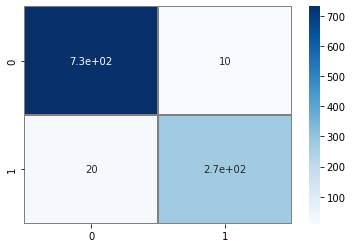

In [85]:
#model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
y_pred = nb.predict(x_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', linewidths=2, linecolor='gray')